In [11]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import dill

In [12]:
dill.load_session('model.db')

In [13]:
def imageprepare(argv):
    """
    This function returns the pixel values.
    The input is a png file location.
    """
    image = Image.open(argv).convert('L')
    width = float(image.size[0])
    height = float(image.size[1])
    
    # creates white canvas of 28x28 pixels
    new_image = Image.new('L', (28, 28), (255))  

    # check which dimension is bigger
    if width > height:  
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = image.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        new_image.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = image.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical position
        new_image.paste(img, (wleft, 4))  # paste resized image on white canvas

    # new_image.save("test_saved.png")
    # get pixel values
    tv = list(new_image.getdata())  
    # reverse black and white
    tva = [(255 - x) for x in tv]
    return tva

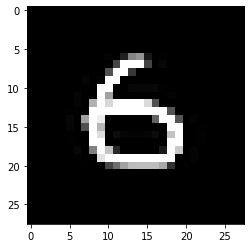

Predict = 6


array([8.53592865e-05, 1.53702857e-05, 2.73886943e-04, 3.53494553e-06,
       1.71071653e-02, 2.24193772e-02, 9.59958524e-01, 1.45529572e-05,
       6.45217755e-06, 1.15776779e-04])

In [14]:
x = imageprepare('./test/test.png') #file path here
x = np.array(x)
x = np.reshape(x, (28,28))
inputs = np.reshape(x, (784,1))/255.0
plt.gray()
plt.imshow(x)
plt.show()
nn.predict(inputs)

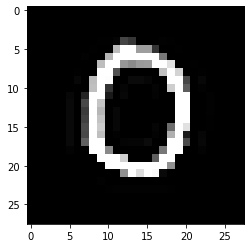

Predict = 0


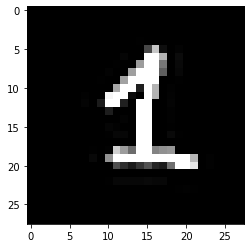

Predict = 1


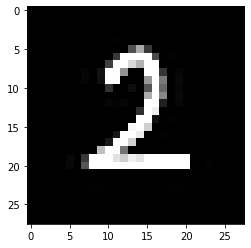

Predict = 2


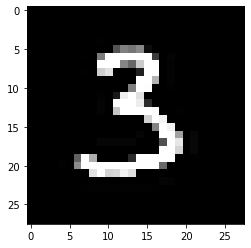

Predict = 3


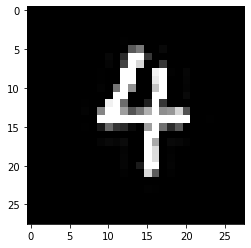

Predict = 4


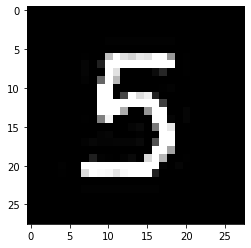

Predict = 5


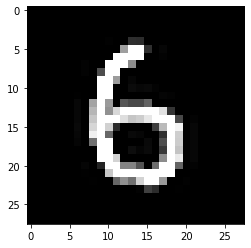

Predict = 6


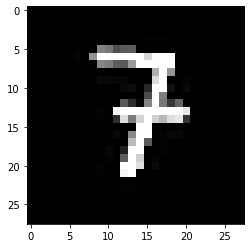

Predict = 7


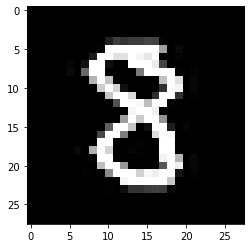

Predict = 8


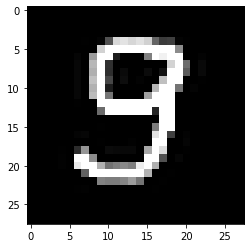

Predict = 3


In [15]:
for i in range(10):
    img_path = './test/'+str(i)+'.png'
    x = imageprepare(img_path)
    x = np.array(x)
    x = np.reshape(x, (28,28))
    inputs = np.reshape(x, (784,1))/255.0
    plt.gray()
    plt.imshow(x)
    plt.show()
    result = nn.predict(inputs)